Importing libraries

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
%matplotlib inline

Loading and preparing data

In [34]:
Stock_data = pd.read_csv("Google_Stock_Price_Train.csv")
Stock_data= Stock_data.replace(',', '', regex=True)
Stock_data[['Close','Volume',]] = Stock_data[['Close','Volume']].astype(float)
Stock_data['Date'] = pd.to_datetime(Stock_data['Date'])
Stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1278 non-null   datetime64[ns]
 1   Open    1278 non-null   float64       
 2   High    1278 non-null   float64       
 3   Low     1278 non-null   float64       
 4   Close   1278 non-null   float64       
 5   Volume  1278 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 60.0 KB


In [35]:
Stock_data = Stock_data.set_index('Date')
Stock_data

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0
...,...,...,...,...,...
2017-01-25,829.62,835.77,825.06,835.67,1494500.0
2017-01-26,837.81,838.00,827.01,832.15,2973900.0
2017-01-27,834.71,841.95,820.44,823.31,2965800.0


In [36]:
Stock_data.describe()

,Open,High,Low,Close,Volume
count,1278.000000,1278.000000,1278.000000,1278.000000,1.278000e+03
mean,537.994906,542.168897,533.278803,714.160039,3.134661e+06
std,154.508365,155.582501,153.174011,163.892416,2.265015e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,406.037500,408.230000,403.335000,578.412500,1.608700e+06
50%,538.395000,542.330000,534.355000,698.150000,2.528700e+06
75%,668.862500,677.705000,662.190000,785.572500,4.106200e+06
max,837.810000,841.950000,827.010000,1216.830000,2.497790e+07


Train/Test split

In [183]:
train = Stock_data.loc[Stock_data.index < '2016-01-01']
test = Stock_data.loc[Stock_data.index >= '2016-01-01']

X_train = train[['Open','Low','Close','Volume']]
y_train = train[['High']]

X_test = test[['Open','Low','Close','Volume']]
y_test = test[['High']]

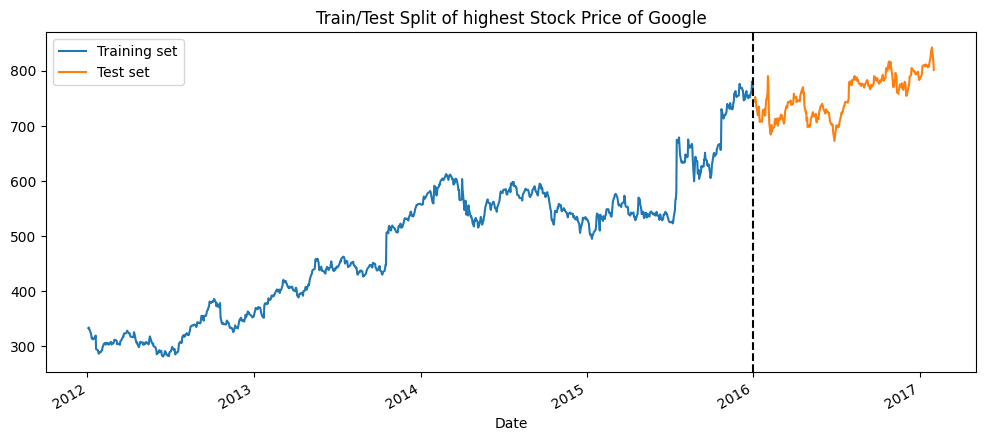

In [184]:
fig,ax = plt.subplots(figsize=(12,5))
train['High'].plot(ax=ax, label='Training set')
test['High'].plot(ax=ax, label='Test set')
ax.legend()
plt.title("Train/Test Split of highest Stock Price of Google")
ax.axvline('2016-01-01', color='black', ls='--')
plt.show()


Creating the model and finding the accuracy of the model

In [199]:
reg = xgb.XGBRegressor(n_estimators=300, learning_rate = 0.1)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Accuracy of the train set: {:.3f}".format(reg.score(X_train,y_train)))
print("Accuracy of the test set: {:.3f}".format(reg.score(X_test,y_test)))
print("MSE of the test set: {:.3f}".format(mean_absolute_error(y_test,predictions)))

Accuracy of the train set: 1.000
Accuracy of the test set: 0.859
MSE of the test set: 8.933


In [200]:

combined = pd.concat([y_test, pd.Series(predictions, index=X_test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined

,actual,predictions
Date,,
2016-01-04,744.06,750.616699
2016-01-05,752.00,754.630493
2016-01-06,747.18,740.226746
2016-01-07,738.50,734.759521
2016-01-08,733.23,731.742676
...,...,...
2017-01-25,835.77,777.571716
2017-01-26,838.00,777.849426
2017-01-27,841.95,778.118164


<AxesSubplot: xlabel='Date'>

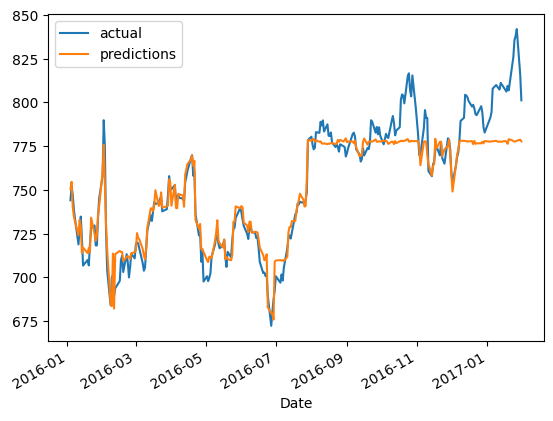

In [201]:
combined.plot()

Feature Importance

In [202]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(reg.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances

,importance
feature,
Open,0.563
Low,0.398
Close,0.039
Volume,0.000
